# basic

In [2]:
#!/usr/local/bin/python

import os, sys
import json
import numpy as np
import matplotlib.pyplot as plt
import chainer
from chainer import cuda
from matplotlib import animation
from optparse import OptionParser

from elecpy.util.cmap_bipolar import bipolar
import elecpy.elecpy as elp

from matplotlib import animation, rc
from IPython.display import HTML

import time

%matplotlib inline

## set up parameters

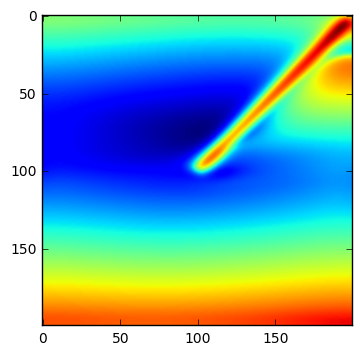

In [18]:
temp = np.load('/mnt/Omer/Project/03.LinearRegionalCooling/SimulationResult/2D/20181208-7/vmem_0470.npy').reshape((200, 200))
plt.imshow(temp)

In [19]:
num = 8

while num < 11:
    # load sample parameter
    with open ('elecpy/temp/sim_params_cooling.json','r') as f:
        sim_params = json.load(f)
        
        
    # modify parameters
    sim_params['log']['path'] = '/mnt/Omer/Project/03.LinearRegionalCooling/SimulationResult/2D/20181208-%s' % num
    sim_params['restart']['source'] = '/mnt/Omer/Project/03.LinearRegionalCooling/SimulationResult/2D/20181207-1/'
    sim_params['restart']['temp_src'] = '/mnt/Omer/Project/03.LinearRegionalCooling/SimulationResult/temp/20181207-%s/' % num
    if num % 4 == 1:
        sim_params['restart']['count'] = 955
    elif num % 4 == 2:
        sim_params['restart']['count'] = 965
    elif num % 4 == 3:
        sim_params['restart']['count'] = 990
    elif num % 4 == 0:
        sim_params['restart']['count'] = 1000    
    
    if not os.path.exists(sim_params['log']['path']):
        os.makedirs(sim_params['log']['path'])

    print json.dumps(sim_params, indent=4)
    
    g = elp.sim_generator(sim_params)
    
    while True:
        img = g.next()
        if img is False: break
    
    num += 1

{
    "cell_type": "luorudy", 
    "log": {
        "path": "/mnt/Omer/Project/03.LinearRegionalCooling/SimulationResult/2D/20181208-8", 
        "cnt": 1000
    }, 
    "stimulation": {
        "extracellular": [], 
        "membrane": []
    }, 
    "time": {
        "end": 999, 
        "udt": 0.001
    }, 
    "geometory": {
        "width": 200, 
        "ds": 0.015, 
        "height": 200
    }, 
    "restart": {
        "count": 1000, 
        "source": "/mnt/Omer/Project/03.LinearRegionalCooling/SimulationResult/2D/20181207-1/", 
        "temp_src": "/mnt/Omer/Project/03.LinearRegionalCooling/SimulationResult/temp/20181207-8/", 
        "inactivate_radius": 10.0
    }
}
elecpy simulation start!
Stimulation settings ...done
Allocating data... ...done
Initializing data... ...done
Building PDE system ...

CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBAPRO_CUDA_DRIVER
with the file path of the CUDA driver shared library.
: